In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Question 1

(3 points) This problem will use the Salaries dataset (review your own answers of the problem 8
of homework 1). The data has six variables, gender, title, years of services, years after Ph.D., and
fields.


a. Use the mantra and Tableau to present an overview of the dataset with all six variables
present on the same graph.


b. Then plot a boxplot to compare the salaries of faculty based on rank and gender

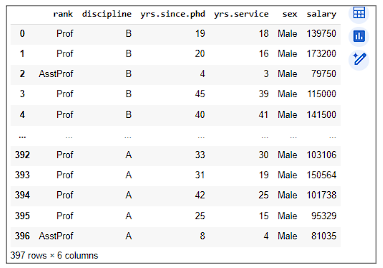

In [ ]:
#Answer 1
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/M.S. Courses/DS 544 Data Viz/Datasets/Salaries.csv')
print(df.head())

       rank discipline  yrs.since.phd  yrs.service   sex  salary
0      Prof          B             19           18  Male  139750
1      Prof          B             20           16  Male  173200
2  AsstProf          B              4            3  Male   79750
3      Prof          B             45           39  Male  115000
4      Prof          B             40           41  Male  141500


In [ ]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [ ]:
print('Mean:',df.groupby('rank').mean(numeric_only=True))
print('Median:', df.groupby('rank').median(numeric_only=True))

Mean:            yrs.since.phd  yrs.service         salary
rank                                                
AssocProf      15.453125    11.953125   93876.437500
AsstProf        5.104478     2.373134   80775.985075
Prof           28.300752    22.815789  126772.109023
Median:            yrs.since.phd  yrs.service    salary
rank                                           
AssocProf           12.0          8.0   95626.5
AsstProf             4.0          3.0   79800.0
Prof                28.0         21.0  123321.5


In [ ]:
# Filter for professors only
professors = df[df['rank'] == 'Prof']

# Group by sex and calculate the mean and median salary
print('Mean:', professors.groupby('sex').mean(numeric_only=True))
print('Median:', professors.groupby('sex').median(numeric_only=True))

Mean:         yrs.since.phd  yrs.service         salary
sex                                              
Female      23.722222    17.111111  121967.611111
Male        28.633065    23.229839  127120.822581
Median:         yrs.since.phd  yrs.service    salary
sex                                         
Female           23.0         17.0  120257.5
Male             28.0         22.0  123996.0


#Answer A


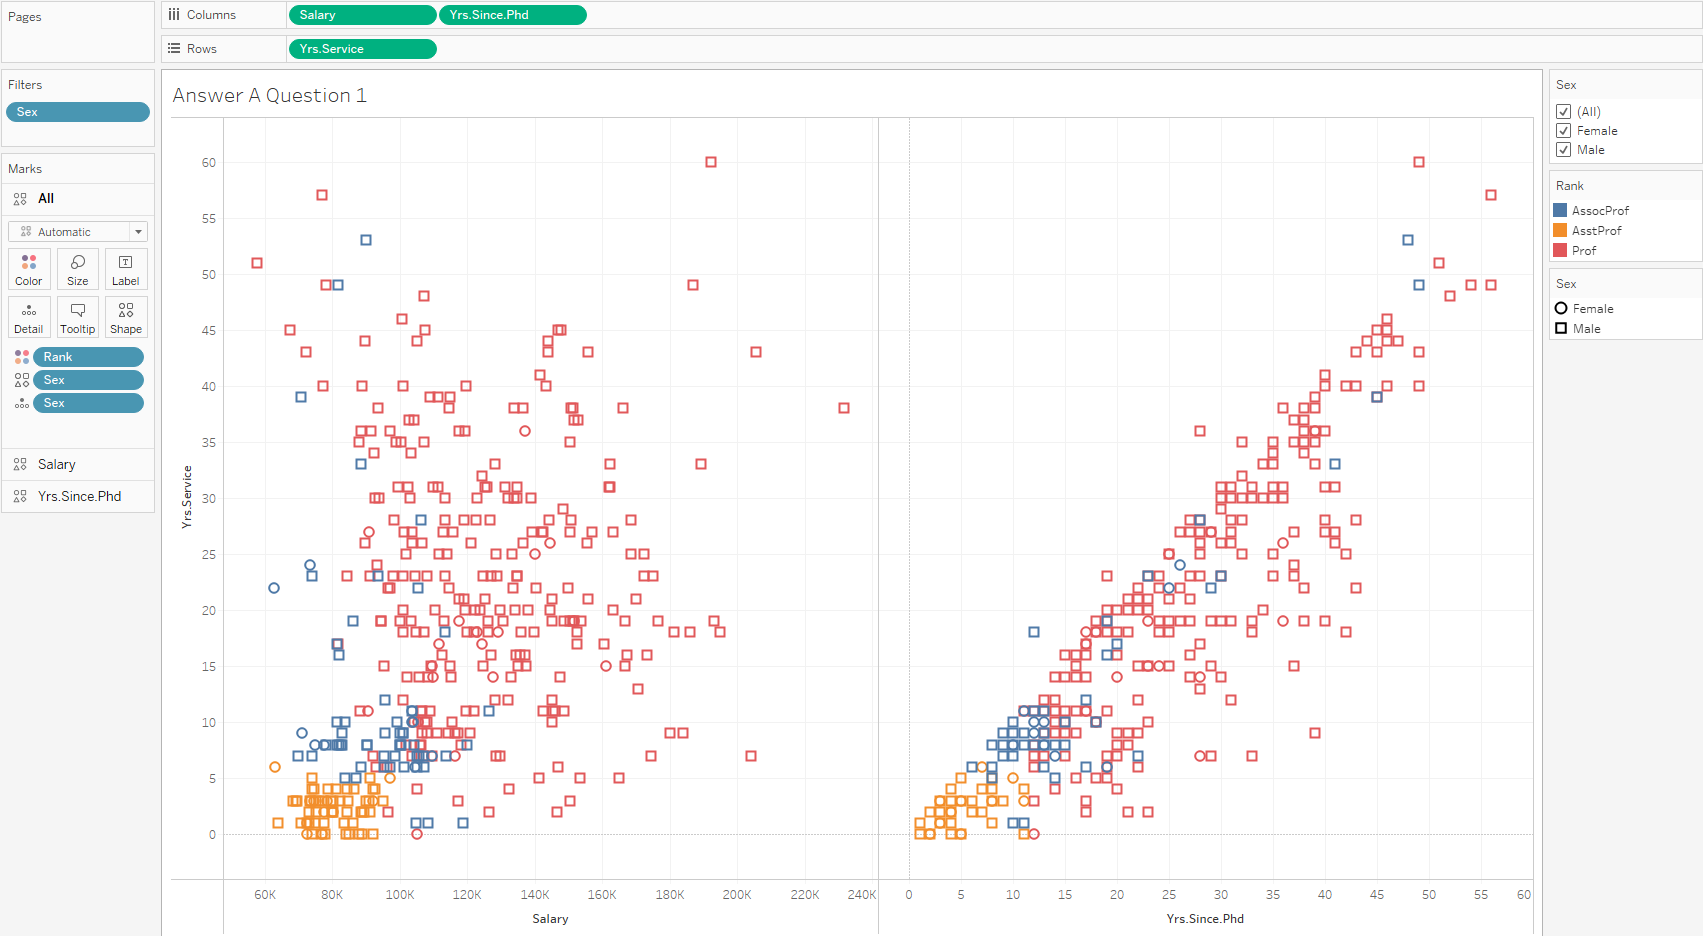

#Answer B

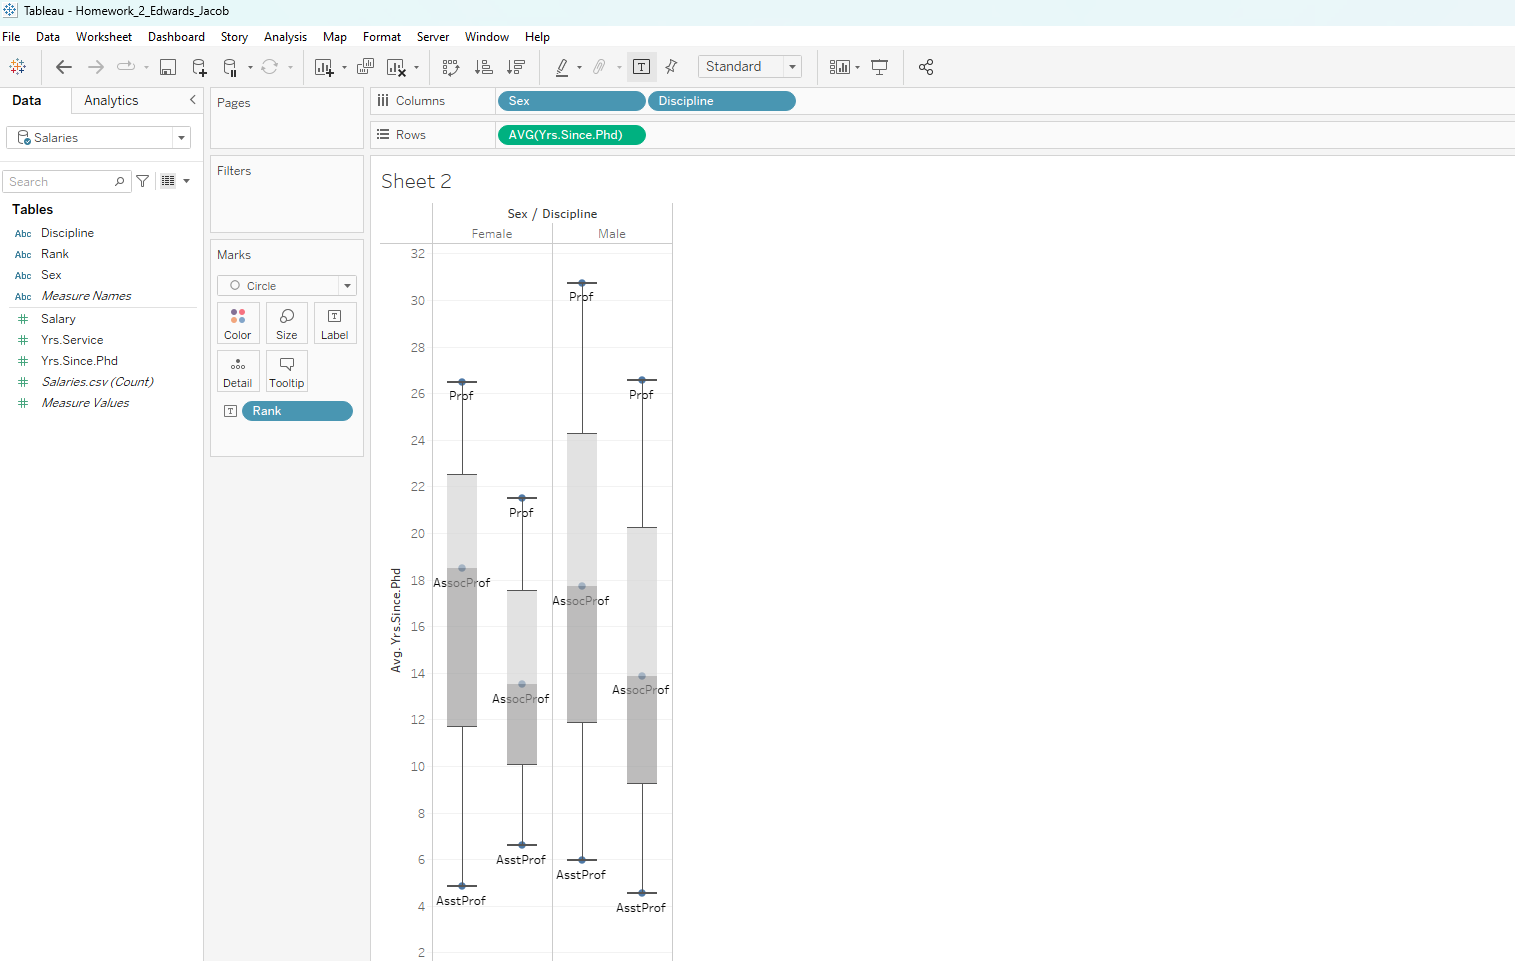

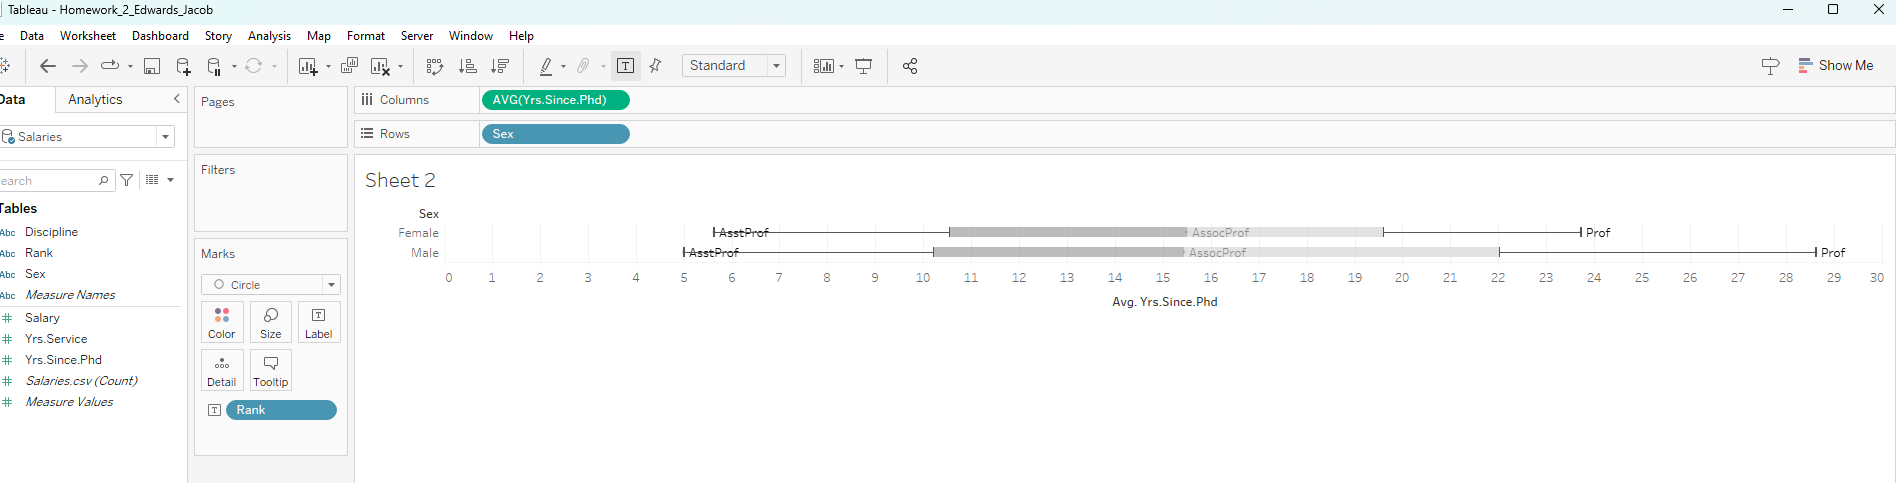

#Question 2

4 (points) This problem will use the Salaries dataset again to practice data wrangling by Pandas.
The data has six variables, gender, title, years of services, years after Ph.D., and fields.


a. Sort the data based on salary, then use loc or iloc to select the rows from the 25% to
75% for the female full professors and assign the data as
Med_female_full_prof_salaries, and do the same to the male full professors and assign
the data as Med_male_full_prof_salaries.


b. Drop the professors of the two datasets above who have earned phd more than 30 years
and have yrs.service more than 20 years, and assign the same names.


c. Use describe function to compare the two data sets above and Use boxplot to compare
their salary distribution side by side

In [ ]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [ ]:
df = df.sort_values(by='salary', ascending = False)
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,Prof,B,38,38,Male,231545
364,Prof,A,43,43,Male,205500
249,Prof,A,29,7,Male,204000
271,Prof,A,42,18,Male,194800
77,Prof,B,26,19,Male,193000
...,...,...,...,...,...,...
317,Prof,B,46,45,Male,67559
226,AsstProf,A,3,1,Male,63900
237,AsstProf,A,7,6,Female,63100
123,AssocProf,A,25,22,Female,62884


#Part A & B)

In [ ]:
# Filter for female full professors and find the 25th and 75th percentiles
female_full_prof = df[(df['sex'] == 'Female') & (df['rank'] == 'Prof')]
female_full_prof_25th = female_full_prof['salary'].quantile(0.25)
female_full_prof_75th = female_full_prof['salary'].quantile(0.75)

# Select rows within the 25th to 75th percentiles for female full professors using loc
Med_female_full_prof_salaries = female_full_prof.loc[(female_full_prof['salary'] >= female_full_prof_25th) & (female_full_prof['salary'] <= female_full_prof_75th)]
Med_female_full_prof_salaries = Med_female_full_prof_salaries[(Med_female_full_prof_salaries['yrs.service'] <= 20) | (Med_female_full_prof_salaries['yrs.since.phd'] <= 30)]

# Print the result
print(Med_female_full_prof_salaries)

# Repeat for male full professors
male_full_prof = df[(df['sex'] == 'Male') & (df['rank'] == 'Prof')]
male_full_prof_25th = male_full_prof['salary'].quantile(0.25)
male_full_prof_75th = male_full_prof['salary'].quantile(0.75)

Med_male_full_prof_salaries = male_full_prof.loc[(male_full_prof['salary'] >= male_full_prof_25th) & (male_full_prof['salary'] <= male_full_prof_75th)]

# Drop professors with PhD more than 30 years and service more than 20 years
Med_male_full_prof_salaries = Med_male_full_prof_salaries[(Med_male_full_prof_salaries['yrs.service'] <= 20) | (Med_male_full_prof_salaries['yrs.since.phd'] <= 30)]

     rank discipline  yrs.since.phd  yrs.service     sex  salary
9    Prof          B             18           18  Female  129000
103  Prof          B             20           14  Female  127512
341  Prof          B             17           17  Female  124312
84   Prof          B             17           18  Female  122960
233  Prof          A             36           19  Female  117555
254  Prof          A             28            7  Female  116450
68   Prof          B             17           17  Female  111512
358  Prof          A             28           14  Female  109954


In [ ]:
print(Med_male_full_prof_salaries)

     rank discipline  yrs.since.phd  yrs.service   sex  salary
215  Prof          B             16           11  Male  145350
221  Prof          B             23           10  Male  145200
333  Prof          B             33           19  Male  145098
355  Prof          B             25           21  Male  145028
337  Prof          B             13           12  Male  145000
..    ...        ...            ...          ...   ...     ...
53   Prof          B             16            9  Male  106639
142  Prof          A             19           11  Male  106608
25   Prof          A             21            8  Male  106294
340  Prof          B             13           11  Male  106231
165  Prof          B             21            8  Male  105890

[84 rows x 6 columns]


#Part C)

Female Full Professors:
count         8.000000
mean     119906.875000
std        7134.068113
min      109954.000000
25%      115215.500000
50%      120257.500000
75%      125112.000000
max      129000.000000
Name: salary, dtype: float64

Male Full Professors:
count        84.000000
mean     124083.226190
std       12398.685376
min      105890.000000
25%      113315.500000
50%      123041.500000
75%      134840.250000
max      145350.000000
Name: salary, dtype: float64


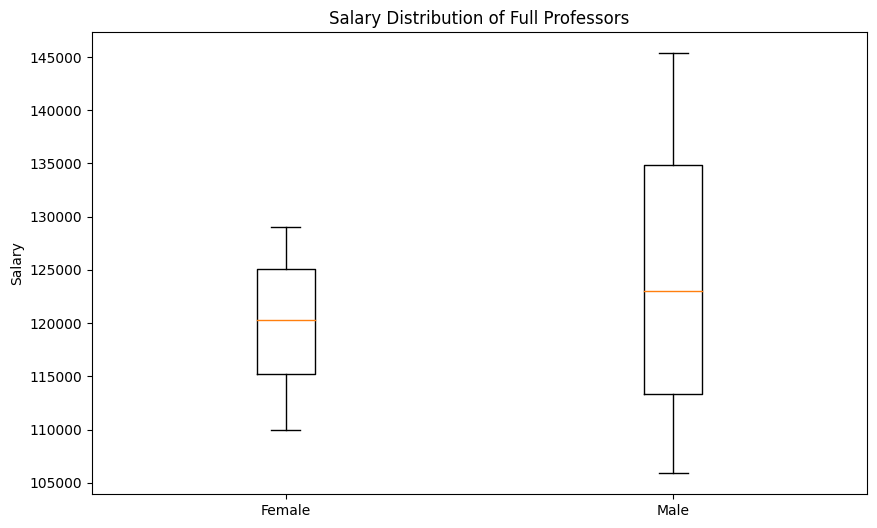

In [ ]:
print("Female Full Professors:")
print(Med_female_full_prof_salaries['salary'].describe())
print("\nMale Full Professors:")
print(Med_male_full_prof_salaries['salary'].describe())

# Create box plots
plt.figure(figsize=(10, 6))
plt.boxplot([Med_female_full_prof_salaries['salary'], Med_male_full_prof_salaries['salary']], labels=['Female', 'Male'])
plt.title('Salary Distribution of Full Professors')
plt.ylabel('Salary')
plt.show()

#Question 3

5 points) This problem will use the Tips dataset that includes 7 variables and 244 observations.
Pretend that you are the waiter or waitress and try to figure out how to select the best days and
time of maximize your serving income, and estimate the tips based on the size of the table and
the total bill. You may use Tableau to help explore the answers, but need to use Pandas and
Matplotlib to find out your answers to the following questions.

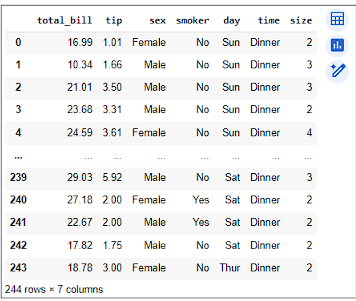


a. Import pandas as pd and matplotlib.pyplot as plt, then read the tip dataset into df, and
call df.head() to check the 7 data features first.


b. Find the mean of tips groupby the ‘day’ feature and assign it as ave_tip_by_day, then use
ave_tip_by_day.plot(kind = “bar”) to observe the mean tips of the 7 days.


c. Use summative statistics to find the mean, median or total_bill and tip groupby both the
day and time features. Which day and what time is the best time to serve in order to
earn more tip?


d. Use df.plot(x = ‘totol_bill”, y = ‘tip’, kind = ‘scatter’) to visualize the correlation between
total_bill and tip.


e. Add a new column ratio_tip_bill and sort in decreasing order of the ratio of tip over the
total_bill.


f. Use boxplot to find the distribution of ratio_tip_bill for waiters and waitress


g. Plot a bar chart of the ration_tip_bill with 8 bins to compare side by side with blue color
for waiter and green for waitress.


h. Plot bar chart to find which type of customers are more generous, smokers or
nonsmokers in general?

#Part A & B)


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


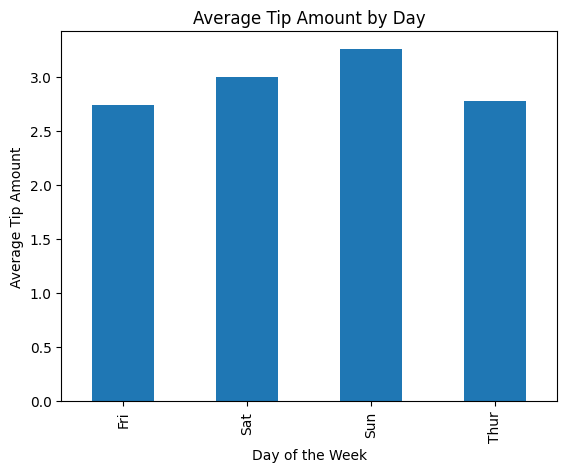

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/M.S. Courses/DS 544 Data Viz/Datasets/tips.csv')
print(df.head())
ave_tip_by_day = df.groupby('day').mean(numeric_only=True)['tip']

# Create a bar plot to visualize the average tip amounts
ave_tip_by_day.plot(kind='bar')

# Add labels and a title to the plot
plt.xlabel('Day of the Week')
plt.ylabel('Average Tip Amount')
plt.title('Average Tip Amount by Day')

# Show the plot
plt.show()

#Part C)

In [ ]:
# Calculate summary statistics for total_bill and tip, grouped by day and time
summary_stats = df.groupby(['day', 'time'])[['total_bill', 'tip']].agg(['mean', 'median'])

# Find the day and time with the highest average tip
best_day_time = summary_stats['tip']['mean'].idxmax()

print(summary_stats)
print(f'\nBest day and time to serve for higher tips: {best_day_time}')

            total_bill               tip       
                  mean  median      mean median
day  time                                      
Fri  Dinner  19.663333  18.665  2.940000   3.00
     Lunch   12.845714  13.420  2.382857   2.20
Sat  Dinner  20.441379  18.240  2.993103   2.75
Sun  Dinner  21.410000  19.630  3.255132   3.15
Thur Dinner  18.780000  18.780  3.000000   3.00
     Lunch   17.664754  16.000  2.767705   2.30

Best day and time to serve for higher tips: ('Sun', 'Dinner')


#Part D & E)


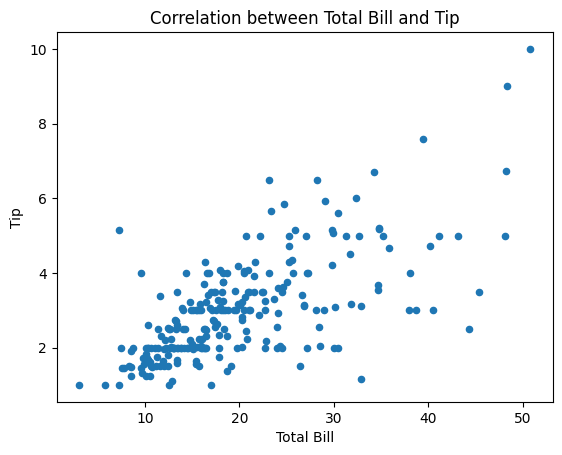




     total_bill   tip     sex smoker  day    time  size  ratio_tip_bill
172        7.25  5.15    Male    Yes  Sun  Dinner     2        0.710345
178        9.60  4.00  Female    Yes  Sun  Dinner     2        0.416667
67         3.07  1.00  Female    Yes  Sat  Dinner     1        0.325733
232       11.61  3.39    Male     No  Sat  Dinner     2        0.291990
183       23.17  6.50    Male    Yes  Sun  Dinner     4        0.280535
..          ...   ...     ...    ...  ...     ...   ...             ...
187       30.46  2.00    Male    Yes  Sun  Dinner     5        0.065660
0         16.99  1.01  Female     No  Sun  Dinner     2        0.059447
57        26.41  1.50  Female     No  Sat  Dinner     2        0.056797
102       44.30  2.50  Female    Yes  Sat  Dinner     3        0.056433
237       32.83  1.17    Male    Yes  Sat  Dinner     2        0.035638

[244 rows x 8 columns]


In [ ]:

df.plot(x='total_bill', y='tip', kind='scatter')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Correlation between Total Bill and Tip')
plt.show()
# Add a new column 'ratio_tip_bill'
df['ratio_tip_bill'] = df['tip'] / df['total_bill']
print()
print()
print()
# Sort the DataFrame in descending order of 'ratio_tip_bill'
df_sorted = df.sort_values('ratio_tip_bill', ascending=False)

print(df_sorted)

#Part F)

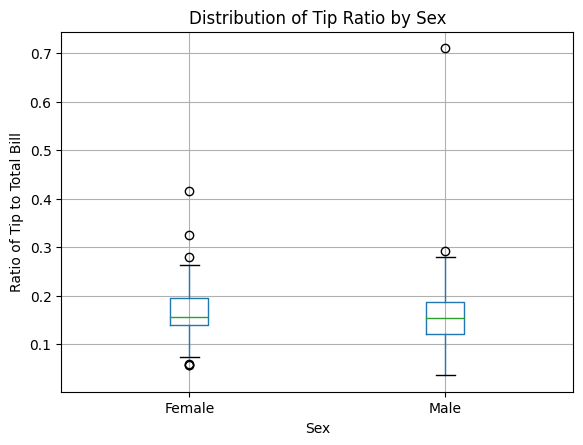

In [ ]:
# Create a boxplot to visualize the distribution of ratio_tip_bill for waiters and waitresses
df.boxplot(column='ratio_tip_bill', by='sex')
plt.xlabel('Sex')
plt.ylabel('Ratio of Tip to Total Bill')
plt.title('Distribution of Tip Ratio by Sex')
plt.suptitle('')  # Remove the automatic title above the plot
plt.show()

#Part G)

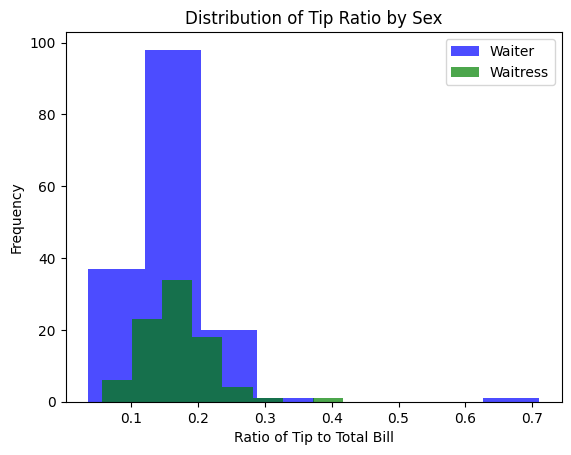

In [ ]:
plt.hist(df[df['sex'] == 'Male']['ratio_tip_bill'], bins=8, color='blue', alpha=0.7, label='Waiter')
plt.hist(df[df['sex'] == 'Female']['ratio_tip_bill'], bins=8, color='green', alpha=0.7, label='Waitress')

plt.xlabel('Ratio of Tip to Total Bill')
plt.ylabel('Frequency')
plt.title('Distribution of Tip Ratio by Sex')
plt.legend()
plt.show()

#Part H)


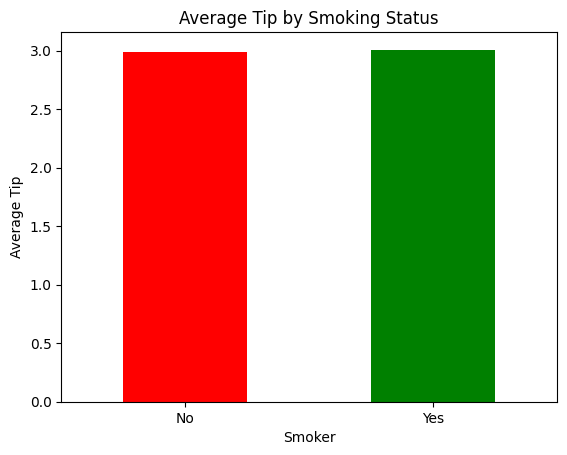

In [ ]:
avg_tip = df.groupby('smoker')['tip'].mean()

# Create a bar plot
avg_tip.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Smoker')
plt.ylabel('Average Tip')
plt.title('Average Tip by Smoking Status')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

In [ ]:
avg_tip = df.groupby('smoker')['tip'].mean()
avg_tip
#Technically the smokers are more generous based on this dataset. However, the graph doesn't show that well since it's so close in comparison.
#The view below shows it a little better.

,tip
smoker,
No,2.991854
Yes,3.008710


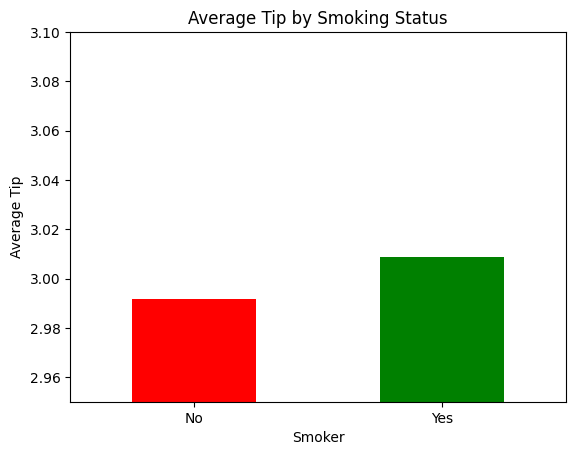

In [ ]:
# Create a bar plot with adjusted y-axis limits
avg_tip.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Smoker')
plt.ylabel('Average Tip')
plt.title('Average Tip by Smoking Status')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Set y-axis limits for a tighter view
plt.ylim(2.95, 3.1)

plt.show()

#Question 4)

In [16]:
#Part A
#Question: Import Data


import pandas as pd
faang = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/M.S. Courses/DS 544 Data Viz/faang.csv', index_col=False)
faang

,ticker,date,open,high,low,close,volume
0,FB,2018-01-02,177.68,181.58,177.5500,181.42,18151903
1,FB,2018-01-03,181.88,184.78,181.3300,184.67,16886563
2,FB,2018-01-04,184.90,186.21,184.0996,184.33,13880896
3,FB,2018-01-05,185.59,186.90,184.9300,186.85,13574535
4,FB,2018-01-08,187.20,188.90,186.3300,188.28,17994726
...,...,...,...,...,...,...,...
1250,GOOG,2018-12-24,973.90,1003.54,970.1100,976.22,1590328
1251,GOOG,2018-12-26,989.01,1040.00,983.0000,1039.46,2373270
1252,GOOG,2018-12-27,1017.15,1043.89,997.0000,1043.88,2109777
1253,GOOG,2018-12-28,1049.62,1055.56,1033.1000,1037.08,1413772


In [17]:
#Part B
#Question: With faang, use type conversion to change the date column to datetime and the volume column to integers. Then sort by date and ticker.


faang = faang.assign(
    date=pd.to_datetime(faang.date),
    volume=faang.volume.astype(int)
).sort_values(
    ['date', 'ticker']
)
faang.head()

,ticker,date,open,high,low,close,volume
251,AAPL,2018-01-02,166.9271,169.0264,166.0442,168.9872,25555934
502,AMZN,2018-01-02,1172.0000,1190.0000,1170.5100,1189.0100,2694494
0,FB,2018-01-02,177.6800,181.5800,177.5500,181.4200,18151903
1004,GOOG,2018-01-02,1048.3400,1066.9400,1045.2300,1065.0000,1237564
753,NFLX,2018-01-02,196.1000,201.6500,195.4200,201.0700,10966889


In [18]:
#Part C

#Question: Find the 7 rows with the highest value for volume.


faang.nlargest(7, 'volume')

,ticker,date,open,high,low,close,volume
142,FB,2018-07-26,174.8900,180.1300,173.7500,176.2600,169803668
53,FB,2018-03-20,167.4700,170.2000,161.9500,168.1500,129851768
57,FB,2018-03-26,160.8200,161.1000,149.0200,160.0600,126116634
54,FB,2018-03-21,164.8000,173.4000,163.3000,169.3900,106598834
433,AAPL,2018-09-21,219.0727,219.6482,215.6097,215.9768,96246748
496,AAPL,2018-12-21,156.1901,157.4845,148.9909,150.0862,95744384
463,AAPL,2018-11-02,207.9295,211.9978,203.8414,205.8755,91328654


In [21]:
#Part D

#Question: Right now, the data is somewhere between long and wide format. Use melt() to make it completely long format.


melted_faang = faang.melt(
    id_vars=['ticker', 'date'],
    value_vars=['open', 'high', 'low', 'close', 'volume']
)
melted_faang.head()

,ticker,date,variable,value
0,AAPL,2018-01-02,open,166.9271
1,AMZN,2018-01-02,open,1172.0000
2,FB,2018-01-02,open,177.6800
3,GOOG,2018-01-02,open,1048.3400
4,NFLX,2018-01-02,open,196.1000


#Part E

Question: Suppose we found out there was a glitch in how the data was recorded on July 26, 2018. How should we handle this?

Answer:
Since this is a substantial data set spanning about a year, the instinct might be to discard that specific date and fill in the gaps through interpolation. However, a quick look into that date for FAANG stocks shows that Facebook experienced a significant drop on that day. Had we interpolated, we would have overlooked the severity of the decline.

#Part F

#Question: The European Centre for Disease Prevention and Control (ECDC) provides an open dataset on COVID-19 cases called daily number of new reported cases of COVID-19 by country worldwide (https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide). This dataset is updated daily, but we will use a snapshot that contains data from January 1, 2020 through September 18, 2020. Clean and pivot the data so that it is in wide format:


a) Read in the covid19_cases.csv file.

b) Create a date column using the data in the dateRep column and the pd.to_datetime() function.

c) Set the date column as the index and sort the index.

d) Replace all occurrences of United_States_of_America and United_Kingdom with USA and UK, respectively. Hint: the replace() method can be run on the dataframe as a whole.

e) Using the countriesAndTerritories column, filter the cleaned COVID-19 cases data down to Argentina, Brazil, China, Colombia, India, Italy, Mexico, Peru, Russia, Spain, Turkey, the UK, and the USA.

f) Pivot the data so that the index contains the dates, the columns contain the country names, and the values are the case counts (the cases column). Be sure to fill in NaN values with 0.

In [41]:
#Part A
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/M.S. Courses/DS 544 Data Viz/covid19_cases.csv')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [42]:
#Part B
df['date'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y', errors='coerce')
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,date
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,2020-12-14
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,2020-12-13
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,2020-12-12
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,2020-12-11
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,2020-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61895,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,2020-03-25
61896,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,2020-03-24
61897,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,2020-03-23
61898,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,2020-03-22


In [43]:
#Part C
df = df.set_index('date').sort_index()
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2019-12-31,31/12/2019,31,12,2019,0,0,Iraq,IQ,IRQ,39309789.0,Asia,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,Netherlands,NL,NLD,17282163.0,Europe,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,Israel,IL,ISR,8519373.0,Asia,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,New_Zealand,NZ,NZL,4783062.0,Oceania,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,Dominican_Republic,DO,DOM,10738957.0,America,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-14,14/12/2020,14,12,2020,316,1,Honduras,HN,HND,9746115.0,America,66.395687
2020-12-14,14/12/2020,14,12,2020,0,0,Holy_See,VA,VAT,815.0,Europe,0.000000
2020-12-14,14/12/2020,14,12,2020,74,1,Haiti,HT,HTI,11263079.0,America,2.672449


In [44]:
#Part D
df = df.replace('United_States_of_America', 'USA').replace('United_Kingdom', 'UK')
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2019-12-31,31/12/2019,31,12,2019,0,0,Iraq,IQ,IRQ,39309789.0,Asia,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,Netherlands,NL,NLD,17282163.0,Europe,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,Israel,IL,ISR,8519373.0,Asia,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,New_Zealand,NZ,NZL,4783062.0,Oceania,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,Dominican_Republic,DO,DOM,10738957.0,America,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-14,14/12/2020,14,12,2020,316,1,Honduras,HN,HND,9746115.0,America,66.395687
2020-12-14,14/12/2020,14,12,2020,0,0,Holy_See,VA,VAT,815.0,Europe,0.000000
2020-12-14,14/12/2020,14,12,2020,74,1,Haiti,HT,HTI,11263079.0,America,2.672449


In [45]:
#Part E

countries_to_keep = ['Argentina', 'Brazil', 'China', 'Colombia', 'India', 'Italy', 'Mexico',
                    'Peru', 'Russia', 'Spain', 'Turkey', 'United_Kingdom', 'United_States_of_America']

# Filter the DataFrame
filtered_df = df[df['countriesAndTerritories'].isin(countries_to_keep)]

# Display the filtered DataFrame
filtered_df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2019-12-31,31/12/2019,31,12,2019,0,0,Brazil,BR,BRA,2.110495e+08,America,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,Spain,ES,ESP,4.693706e+07,Europe,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,Italy,IT,ITA,6.035955e+07,Europe,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,Russia,RU,RUS,1.458723e+08,Europe,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,Mexico,MX,MEX,1.275755e+08,America,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-14,14/12/2020,14,12,2020,21825,279,Brazil,BR,BRA,2.110495e+08,America,278.234228
2020-12-14,14/12/2020,14,12,2020,8608,249,Mexico,MX,MEX,1.275755e+08,America,112.069298
2020-12-14,14/12/2020,14,12,2020,29136,222,Turkey,TR,TUR,8.200388e+07,Europe,499.220269


In [49]:
#Part F
filtered_df = filtered_df.reset_index()
pivoted_df = filtered_df.pivot(index='date',
                                 columns='countriesAndTerritories',
                                 values='cases').fillna(0)

pivoted_df

countriesAndTerritories,Argentina,Brazil,China,Colombia,India,Italy,Mexico,Peru,Russia,Spain,Turkey
date,,,,,,,,,,,
2019-12-31,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-10,5303.0,53453.0,12.0,7523.0,31521.0,12755.0,21974.0,691.0,26190.0,7955.0,31712.0
2020-12-11,6994.0,53347.0,15.0,7778.0,29398.0,16998.0,11897.0,1799.0,27927.0,10519.0,30424.0
2020-12-12,7112.0,54428.0,13.0,8998.0,30006.0,18726.0,12253.0,1832.0,28585.0,0.0,0.0


#Question 5)

Run the Juypter program, then do the five problems in Chapter 4, page 257 in Molin’s
book.

a. Problem #3 (1 points)


b. Problem #5 (1 points)

c. Problem #6 (1 points)

d. Problem #8 (3 points

In [52]:
#Part A
#Question: Using the exercises/faang.csv file, group by the ticker and resample to monthly frequency.
# Aggregate the open and close prices with the mean, the high price with the max, the low price with the min, and the volume with the sum.
import numpy as np
faang = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/M.S. Courses/DS 544 Data Viz/faang.csv')

# Convert the 'date' column to DatetimeIndex
faang['date'] = pd.to_datetime(faang['date']) # Convert the 'date' column to DatetimeIndex
faang = faang.set_index('date') # Set the 'date' column as the index


faang.groupby('ticker').resample('1M').agg(
    {
        'open' : np.mean,
        'high' : np.max,
        'low' : np.min,
        'close' : np.mean,
        'volume' : np.sum
    }
)

<ipython-input-52-76cc1e00f735>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  faang.groupby('ticker').resample('1M').agg(
<ipython-input-52-76cc1e00f735>:12: FutureWarning: The provided callable <function mean at 0x7e4bcc718280> is currently using DatetimeIndexResamplerGroupby.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  faang.groupby('ticker').resample('1M').agg(
<ipython-input-52-76cc1e00f735>:12: FutureWarning: The provided callable <function max at 0x7e4bcc6f7910> is currently using DatetimeIndexResamplerGroupby.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  faang.groupby('ticker').resample('1M').agg(
<ipython-input-52-76cc1e00f735>:12: FutureWarning: The provided callable <function min at 0x7e4bcc6f7a30> is currently using DatetimeIndexRe

open       high        low        close     volume
ticker date                                                                 
AAPL   2018-01-31   170.714690   176.6782   161.5708   170.699271  659679440
       2018-02-28   164.562753   177.9059   147.9865   164.921884  927894473
       2018-03-31   172.421381   180.7477   162.4660   171.878919  713727447
       2018-04-30   167.332895   176.2526   158.2207   167.286924  666360147
       2018-05-31   182.635582   187.9311   162.7911   183.207418  620976206
       2018-06-30   186.605843   192.0247   178.7056   186.508652  527624365
       2018-07-31   188.065786   193.7650   181.3655   188.179724  393843881
       2018-08-31   210.460287   227.1001   195.0999   211.477743  700318837
       2018-09-30   220.611742   227.8939   213.6351   220.356353  678972040
       2018-10-31   219.489426   231.6645   204.4963   219.137822  789748068
       2018-11-30   190.828681   220.6405   169.5328   190.246652  961321947
       2018-12-31   164.537405   184.1501   145.9639   163.564732  898917007
AMZN   2018-01-31  1301.377143  1472.5800  1170.5100  1309.010952   96371290
       2018-02-28  1447.112632  1528.7000  1265.9300  1442.363158  137784020
       2018-03-31  1542.160476  1617.5400  1365.2000  1540.367619  130400151
       2018-04-30  1475.841905  1638.1000  1352.8800  1468.220476  129945743
       2018-05-31  1590.474545  1635.0000  1546.0200  1594.903636   71615299
       2018-06-30  1699.088571  1763.1000  1635.0900  1698.823810   85941510
       2018-07-31  1786.305714  1880.0500  1678.0600  1784.649048   97629820
       2018-08-31  1891.957826  2025.5700  1776.0200  1897.851304   96575676
       2018-09-30  1969.239474  2050.5000  1865.0000  1966.077895   94445693
       2018-10-31  1799.630870  2033.1900  1476.3600  1782.058261  183228552
       2018-11-30  1622.323810  1784.0000  1420.0000  1625.483810  139290208
       2018-12-31  1572.922105  1778.3400  1307.0000  1559.443158  154812304
FB     2018-01-31   184.364762   190.6600   175.8000   184.962857  495655736
       2018-02-28   180.721579   195.3200   167.1800   180.269474  516621991
       2018-03-31   173.449524   186.1000   149.0200   173.489524  996232472
       2018-04-30   164.163557   177.1000   150.5100   163.810476  751130388
       2018-05-31   181.910509   192.7200   170.2300   182.930000  401144183
       2018-06-30   194.974067   203.5500   186.4300   195.267619  387265765
       2018-07-31   199.332143   218.6200   166.5600   199.967143  652763259
       2018-08-31   177.598443   188.3000   170.2700   177.491957  549016789
       2018-09-30   164.232895   173.8900   158.8656   164.377368  500468912
       2018-10-31   154.873261   165.8800   139.0300   154.187826  622446235
       2018-11-30   141.762857   154.1300   126.8500   141.635714  518150415
       2018-12-31   137.529474   147.1900   123.0200   137.161053  558786249
GOOG   2018-01-31  1127.200952  1186.8900  1045.2300  1130.770476   28738485
       2018-02-28  1088.629474  1174.0000   992.5600  1088.206842   42384105
       2018-03-31  1096.108095  1177.0500   980.6400  1091.490476   45430049
       2018-04-30  1038.415238  1094.1600   990.3700  1035.696190   41773275
       2018-05-31  1064.021364  1110.7500  1006.2900  1069.275909   31849196
       2018-06-30  1136.396190  1186.2900  1096.0100  1137.626667   32103642
       2018-07-31  1183.464286  1273.8900  1093.8000  1187.590476   31953386
       2018-08-31  1226.156957  1256.5000  1188.2400  1225.671739   28820379
       2018-09-30  1176.878421  1212.9900  1146.9100  1175.808947   28863199
       2018-10-31  1116.082174  1209.9600   995.8300  1110.940435   48496167
       2018-11-30  1054.971429  1095.5700   996.0200  1056.162381   36735570
       2018-12-31  1042.620000  1124.6500   970.1100  1037.420526   40256461
NFLX   2018-01-31   231.269286   286.8100   195.4200   232.908095  238377533
       2018-02-28   270.873158   297.3600   236.1100   271.443684  184585819
       2018-03-31   31

In [53]:
#Part B
#Question: Calculate the rolling 60-day aggregations of OHLC data by ticker for the FAANG data. Use the same aggregations as exercise 3.
faang.groupby('ticker').rolling('60D').agg(
    {
        'open' : np.mean,
        'high' : np.max,
        'low' : np.min,
        'close' : np.mean,
        'volume' : np.sum
    }
)

<ipython-input-53-527359942acd>:3: FutureWarning: The provided callable <function mean at 0x7e4bcc718280> is currently using RollingGroupby.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  faang.groupby('ticker').rolling('60D').agg(
<ipython-input-53-527359942acd>:3: FutureWarning: The provided callable <function max at 0x7e4bcc6f7910> is currently using RollingGroupby.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  faang.groupby('ticker').rolling('60D').agg(
<ipython-input-53-527359942acd>:3: FutureWarning: The provided callable <function min at 0x7e4bcc6f7a30> is currently using RollingGroupby.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  faang.groupby('ticker').rolling('60D').agg(
<ipython-input-53-527359942acd>

open      high       low       close       volume
ticker date                                                               
AAPL   2018-01-02  166.927100  169.0264  166.0442  168.987200   25555934.0
       2018-01-03  168.089600  171.2337  166.0442  168.972500   55073833.0
       2018-01-04  168.480367  171.2337  166.0442  169.229200   77508430.0
       2018-01-05  168.896475  172.0381  166.0442  169.840675  101168448.0
       2018-01-08  169.324680  172.2736  166.0442  170.080040  121736214.0
...                       ...       ...       ...         ...          ...
NFLX   2018-12-24  283.509250  332.0499  233.6800  281.931750  525657894.0
       2018-12-26  281.844500  332.0499  231.2300  280.777750  520444588.0
       2018-12-27  281.070488  332.0499  231.2300  280.162805  532679805.0
       2018-12-28  279.916341  332.0499  231.2300  279.461341  521968250.0
       2018-12-31  278.430769  332.0499  231.2300  277.451410  476309676.0

[1255 rows x 5 columns]

In [54]:
#Part C
#Question: Create a pivot table of the FAANG data that compares the stocks.

faang.pivot_table(index='ticker')

,close,high,low,open,volume
ticker,,,,,
AAPL,186.986218,188.906858,185.135729,187.038674,3.402145e+07
AMZN,1641.726175,1662.839801,1619.840398,1644.072669,5.649563e+06
FB,171.510936,173.615298,169.303110,171.454424,2.768798e+07
GOOG,1113.225139,1125.777649,1101.001594,1113.554104,1.742645e+06
NFLX,319.290299,325.224583,313.187273,319.620533,1.147030e+07


#Part D
#Question:

Adding event descriptions:

Create a dataframe with three columns: ticker, date, and event.
ticker will be 'FB'.
date will be datetimes ['2018-07-25', '2018-03-19', '2018-03-20']
event will be ['Disappointing user growth announced after close.', 'Cambridge Analytica story', 'FTC investigation'].
Merge this data to the FAANG data with a outer join.

In [56]:
events = pd.DataFrame({
    'ticker' : 'FB',
    'date' : pd.to_datetime(
         ['2018-07-25', '2018-03-19', '2018-03-20']
    ), 'event' : [
         'Disappointing user growth announced after close.',
         'Cambridge Analytica story',
         'FTC investigation'
    ]
}).set_index(['date', 'ticker'])
faang.reset_index().set_index(['date', 'ticker']).join(
    events, how='outer'
).sample(10, random_state=0)

,,open,high,low,close,volume,event
date,ticker,,,,,,
2018-01-03,AAPL,169.2521,171.2337,168.6929,168.9578,29517899,NaN
2018-05-23,NFLX,329.0400,345.0000,328.0900,344.7200,10049147,NaN
2018-01-17,FB,179.2600,179.3200,175.8000,177.6000,27992376,NaN
2018-10-17,AMZN,1842.7900,1845.0000,1807.0000,1831.7300,5295177,NaN
2018-02-26,AMZN,1509.2000,1522.8400,1507.0000,1521.9500,4954988,NaN
2018-01-05,GOOG,1094.0000,1104.2500,1092.0000,1102.2300,1279123,NaN
2018-04-04,FB,152.0250,155.5600,150.5100,155.1000,49885584,NaN
2018-05-30,AMZN,1618.1000,1626.0000,1612.9300,1624.8900,2907357,NaN
2018-04-17,NFLX,329.6600,338.6200,323.7700,336.0600,33866456,NaN


In [60]:
events = pd.DataFrame({
    'ticker' : 'FB',
    'date' : pd.to_datetime(
         ['2018-07-25', '2018-03-19', '2018-03-20']
    ), 'event' : [
         'Disappointing user growth announced after close.',
         'Cambridge Analytica story',
         'FTC investigation'
    ]
}).set_index(['date', 'ticker'])

merged_df = faang.reset_index().set_index(['date', 'ticker']).join(events, how='outer')
display(merged_df)

open       high        low      close    volume event
date       ticker                                                            
2018-01-02 AAPL     166.9271   169.0264   166.0442   168.9872  25555934   NaN
           AMZN    1172.0000  1190.0000  1170.5100  1189.0100   2694494   NaN
           FB       177.6800   181.5800   177.5500   181.4200  18151903   NaN
           GOOG    1048.3400  1066.9400  1045.2300  1065.0000   1237564   NaN
           NFLX     196.1000   201.6500   195.4200   201.0700  10966889   NaN
...                      ...        ...        ...        ...       ...   ...
2018-12-31 AAPL     157.8529   158.6794   155.8117   157.0663  35003466   NaN
           AMZN    1510.8000  1520.7600  1487.0000  1501.9700   6954507   NaN
           FB       134.4500   134.6400   129.9500   131.0900  24625308   NaN
           GOOG    1050.9600  1052.7000  1023.5900  1035.6100   1493722   NaN
           NFLX     260.1600   270.1001   260.0000   267.6600  13508920   NaN

[1255 rows x 6 columns]

In [61]:
#Proof of above code working
dates = ['2018-07-25', '2018-03-19', '2018-03-20']
filtered_df = merged_df[merged_df.index.get_level_values('date').isin(dates)]
display(filtered_df)

<ipython-input-61-61cf9e9950f8>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  filtered_df = merged_df[merged_df.index.get_level_values('date').isin(dates)]


open       high        low      close     volume  \
date       ticker                                                          
2018-03-19 AAPL     174.6604   174.8081   171.0553   172.6707   33446771   
           AMZN    1554.5300  1561.6600  1525.3500  1544.9300    6580766   
           FB       177.0100   177.1700   170.0600   172.5600   88140060   
           GOOG    1120.0100  1121.9900  1089.0100  1099.8200    2805937   
           NFLX     315.8000   317.0000   307.3400   313.4800    9925162   
2018-03-20 AAPL     172.6116   174.1482   172.3161   172.6116   19649350   
           AMZN    1550.3400  1587.0000  1545.4100  1586.5100    4581568   
           FB       167.4700   170.2000   161.9500   168.1500  129851768   
           GOOG    1099.0000  1105.2000  1083.4600  1097.7100    1831896   
           NFLX     313.2600   319.5000   312.8000   317.5000    5991945   
2018-07-25 AAPL     190.8977   192.6675   190.2746   192.6378   16826483   
           AMZN    1829.3000  1863.8400  1822.6400  1863.6100    3836333   
           FB       215.7150   218.6200   214.2700   217.5000   64592585   
           GOOG    1239.1300  1265.8600  1239.1300  1263.7000    2139999   
           NFLX     357.5700   363.2800   355.6500   362.8700    8516248   

                                                              event  
date       ticker                                                    
2018-03-19 AAPL                                                 NaN  
           AMZN                                                 NaN  
           FB                             Cambridge Analytica story  
           GOOG                                                 NaN  
           NFLX                                                 NaN  
2018-03-20 AAPL                                                 NaN  
           AMZN                                                 NaN  
           FB                                     FTC investigation  
           GOOG                                                 NaN  
           NFLX                                                 NaN  
2018-07-25 AAPL                                                 NaN  
           AMZN                                                 NaN  
           FB      Disappointing user growth announced after close.  
           GOOG                                                 NaN  
           NFLX                                                 NaN

#References

https://g.co/gemini/share/bdb7a54b9cb5


https://stackoverflow.com/questions/69115428/merge-rows-based-on-date-range

https://stackoverflow.com/questions/66937685/how-to-combine-rows-in-pandas-with-matching-dates-while-not-combining-the-values

https://www.geeksforgeeks.org/merge-two-pandas-dataframes-based-on-closest-datetime/

In [2]:
pip install nbconvert[webpdf]

   ---------------------------------------- 0.0/29.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/29.9 MB 1.4 MB/s eta 0:00:22
   ---------------------------------------- 0.1/29.9 MB 1.3 MB/s eta 0:00:23
   ---------------------------------------- 0.2/29.9 MB 2.0 MB/s eta 0:00:16
    --------------------------------------- 0.5/29.9 MB 2.8 MB/s eta 0:00:11
    --------------------------------------- 0.5/29.9 MB 2.6 MB/s eta 0:00:12
   - -------------------------------------- 1.0/29.9 MB 3.8 MB/s eta 0:00:08
   - -------------------------------------- 1.0/29.9 MB 3.3 MB/s eta 0:00:09
   - -------------------------------------- 1.2/29.9 MB 3.4 MB/s eta 0:00:09
   - -------------------------------------- 1.2/29.9 MB 3.4 MB/s eta 0:00:09
   -- ------------------------------------- 1.7/29.9 MB 3.9 MB/s eta 0:00:08
   -- ------------------------------------- 1.9/29.9 MB 3.8 MB/s eta 0:00:08
   -- ------------------------------------- 2.1/29.9 MB 3.9 MB/s eta 0:00:08
   ---